In [1]:
# Bibliotecas para pré-processamento e análise dos dados
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Importando dados com pandas
df = pd.read_csv('AirQualityUCI.csv')
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [5]:
# Analisando informações gerais sobre os dados
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


In [6]:
# Continuação da análise geral
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   int64  
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   int64  
 7   NOx(GT)        9357 non-null   int64  
 8   PT08.S3(NOx)   9357 non-null   int64  
 9   NO2(GT)        9357 non-null   int64  
 10  PT08.S4(NO2)   9357 non-null   int64  
 11  PT08.S5(O3)    9357 non-null   int64  
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(5), int64(8), object(2)
memory usage: 1.1+ MB


In [7]:
# Criando uma lista com os nomes das colunas
lista_variaveis = df.columns.to_list()
print(lista_variaveis)

['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']


In [8]:
# Criando uma cópia da lista removendo os elementos que são do tipo Object
lista_variaveis_copia = lista_variaveis
lista_variaveis_copia.remove('Date')
lista_variaveis_copia.remove('Time')
print(lista_variaveis_copia)

['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']


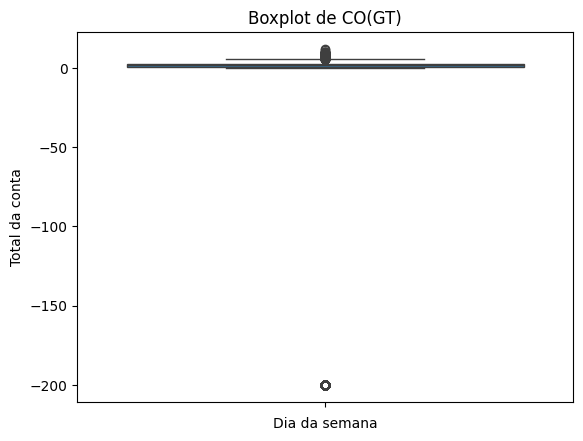

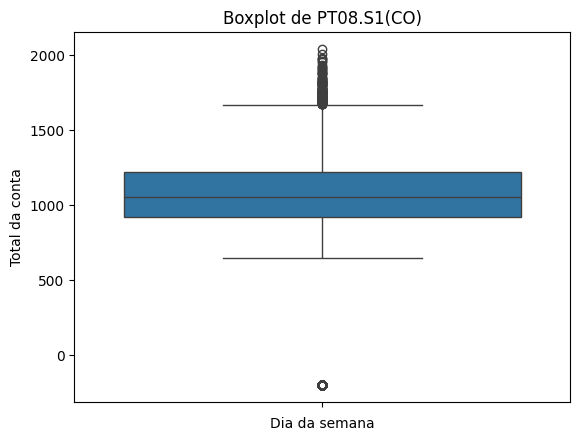

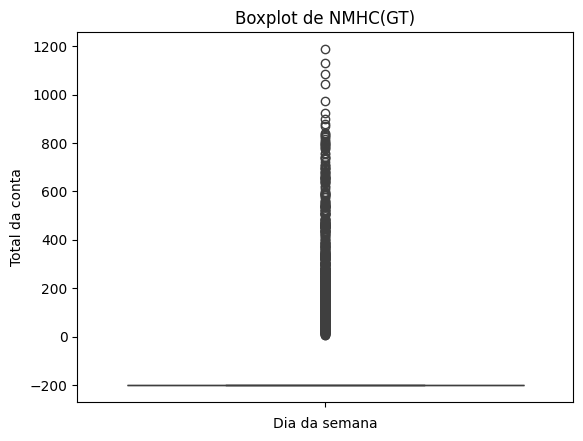

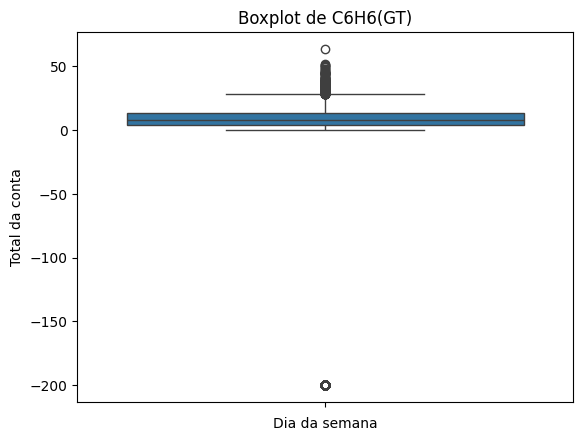

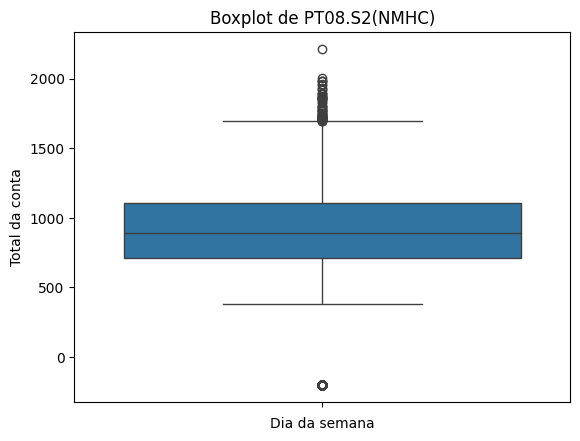

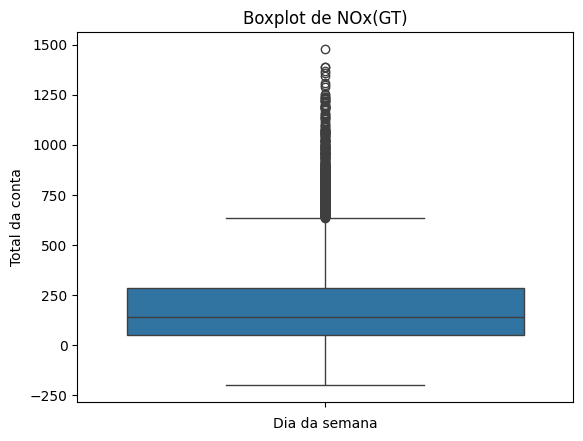

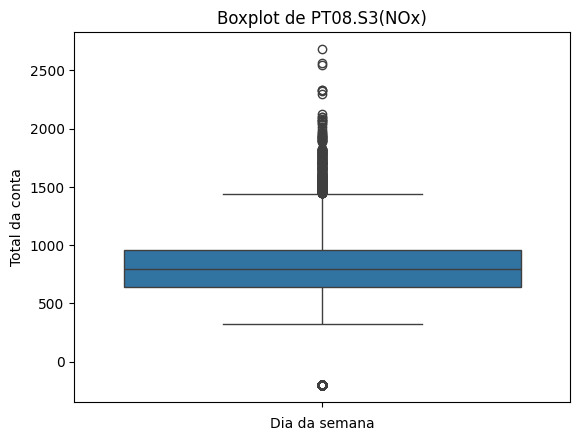

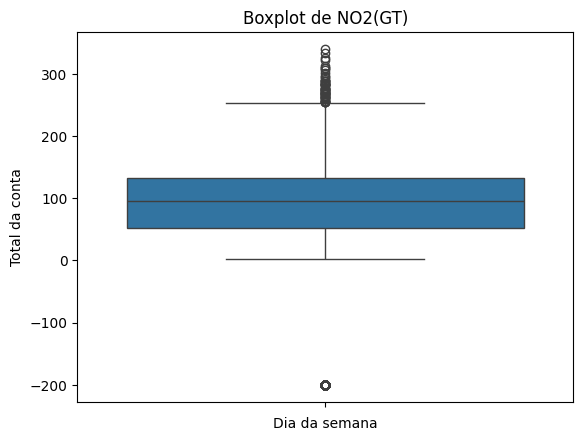

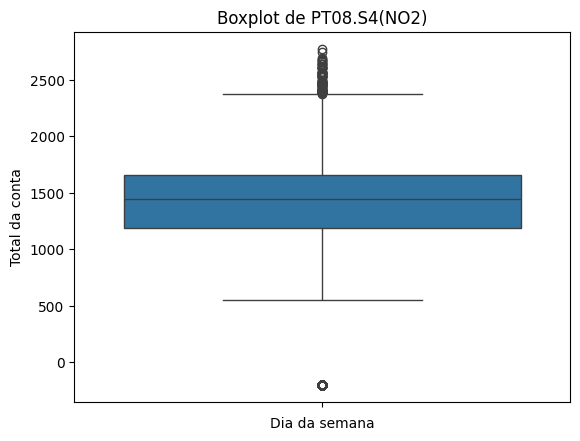

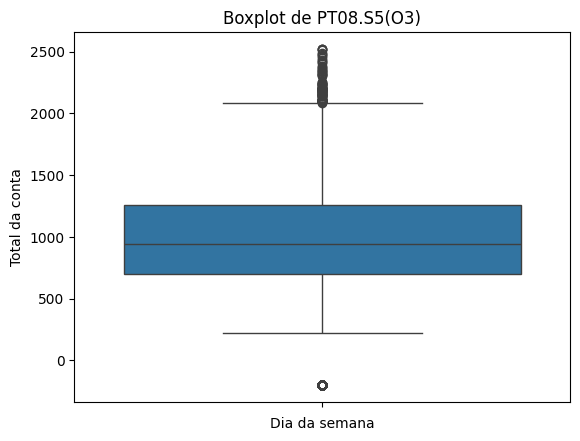

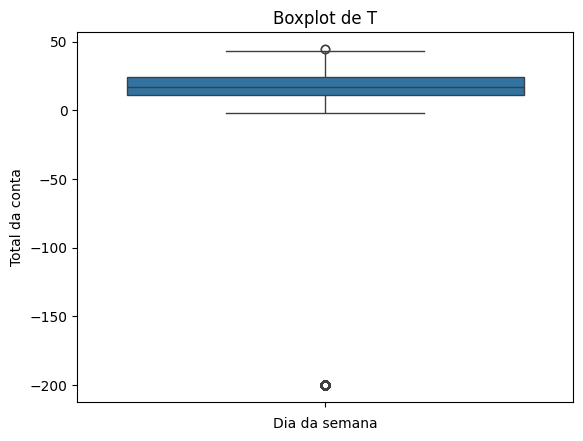

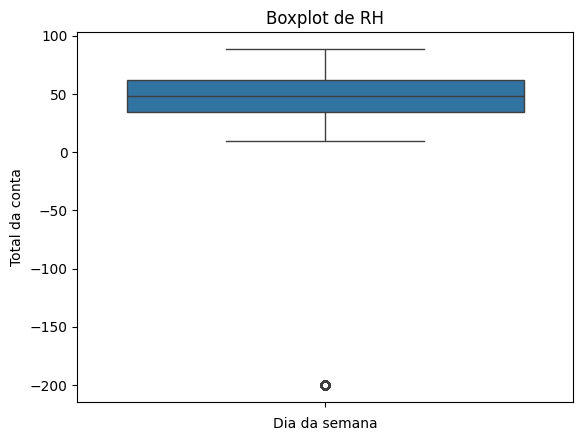

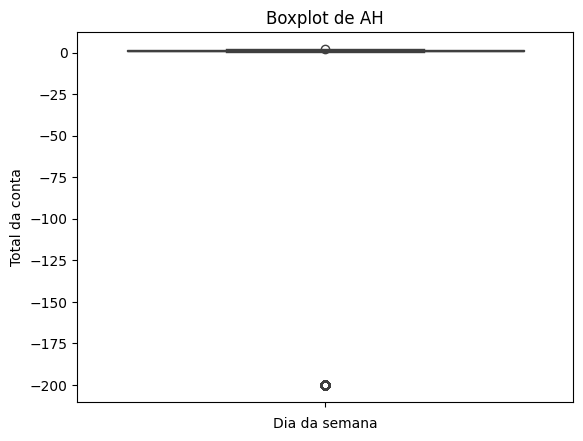

In [9]:
# Geração dos boxplot das colunas para ver a distribuição dos dados
for var in lista_variaveis_copia:
    # Criando um boxplot
    sns.boxplot(y=df[var])

    # Exibindo o gráfico
    plt.title(f'Boxplot de {var}')
    plt.xlabel('Dia da semana')
    plt.ylabel('Total da conta')
    plt.show()

In [10]:
# Já que o número -200.0 parece estar sempre presente, realizar uma contagem de quantas vezes aparece
print("Quantidade de vezes que o -200.0 aparece por coluna\n")
for var in lista_variaveis_copia:
    total = 0
    for val in df[var]:
        if val == -200.0:
            total += 1
    print(f"{var}: {total}")

Quantidade de vezes que o -200.0 aparece por coluna

CO(GT): 1683
PT08.S1(CO): 366
NMHC(GT): 8443
C6H6(GT): 366
PT08.S2(NMHC): 366
NOx(GT): 1639
PT08.S3(NOx): 366
NO2(GT): 1642
PT08.S4(NO2): 366
PT08.S5(O3): 366
T: 366
RH: 366
AH: 366


In [11]:
# Substituindo os -200.0 por NaN
df.replace(-200.0, np.nan, inplace=True)

In [12]:
# Conferindo se todos -200.0 foram substituídos
print("Quantidade de vezes que o -200.0 aparece por coluna\n")
for var in lista_variaveis_copia:
    total = 0
    for val in df[var]:
        if val == -200.0:
            total += 1
    print(f"{var}: {total}")

Quantidade de vezes que o -200.0 aparece por coluna

CO(GT): 0
PT08.S1(CO): 0
NMHC(GT): 0
C6H6(GT): 0
PT08.S2(NMHC): 0
NOx(GT): 0
PT08.S3(NOx): 0
NO2(GT): 0
PT08.S4(NO2): 0
PT08.S5(O3): 0
T: 0
RH: 0
AH: 0


In [13]:
# Ajustando a coluna Date para poder fazer a matriz de correlação
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

df['Date_float'] = df['Year'] + df['Month'] / 12 + df['Day'] / 365

In [14]:
# Ajustando a coluna Time para poder fazer a matriz de correlação
df['Time'] = df['Time'].str.replace('.', ':')
df['Time'] = pd.to_timedelta(df['Time'])

df['Time_float'] = df['Time'].dt.total_seconds()

In [15]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year,Month,Day,Date_float,Time_float
0,2004-03-10,0 days 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2004,3,10,2004.277397,64800.0
1,2004-03-10,0 days 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2004,3,10,2004.277397,68400.0
2,2004-03-10,0 days 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2004,3,10,2004.277397,72000.0
3,2004-03-10,0 days 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2004,3,10,2004.277397,75600.0
4,2004-03-10,0 days 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2004,3,10,2004.277397,79200.0


In [16]:
colunas_para_dropar = ['Year', 'Month', 'Day', 'Date', 'Time']
df.drop(columns=colunas_para_dropar, axis=1, inplace=True)

In [17]:
# Dropando a coluna NMHC(GT) pois ela tem muitos dados NaN e isso pode prejudicar a análise, mesmo substituindo pela mediana
df.drop(columns=['NMHC(GT)'], inplace=True)

In [18]:
# Preencher NaN com a média da coluna
df.dropna(inplace=True)

In [19]:
# Conferindo se o DataFrame foi corretamente alterado
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6941 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         6941 non-null   float64
 1   PT08.S1(CO)    6941 non-null   float64
 2   C6H6(GT)       6941 non-null   float64
 3   PT08.S2(NMHC)  6941 non-null   float64
 4   NOx(GT)        6941 non-null   float64
 5   PT08.S3(NOx)   6941 non-null   float64
 6   NO2(GT)        6941 non-null   float64
 7   PT08.S4(NO2)   6941 non-null   float64
 8   PT08.S5(O3)    6941 non-null   float64
 9   T              6941 non-null   float64
 10  RH             6941 non-null   float64
 11  AH             6941 non-null   float64
 12  Date_float     6941 non-null   float64
 13  Time_float     6941 non-null   float64
dtypes: float64(14)
memory usage: 813.4 KB


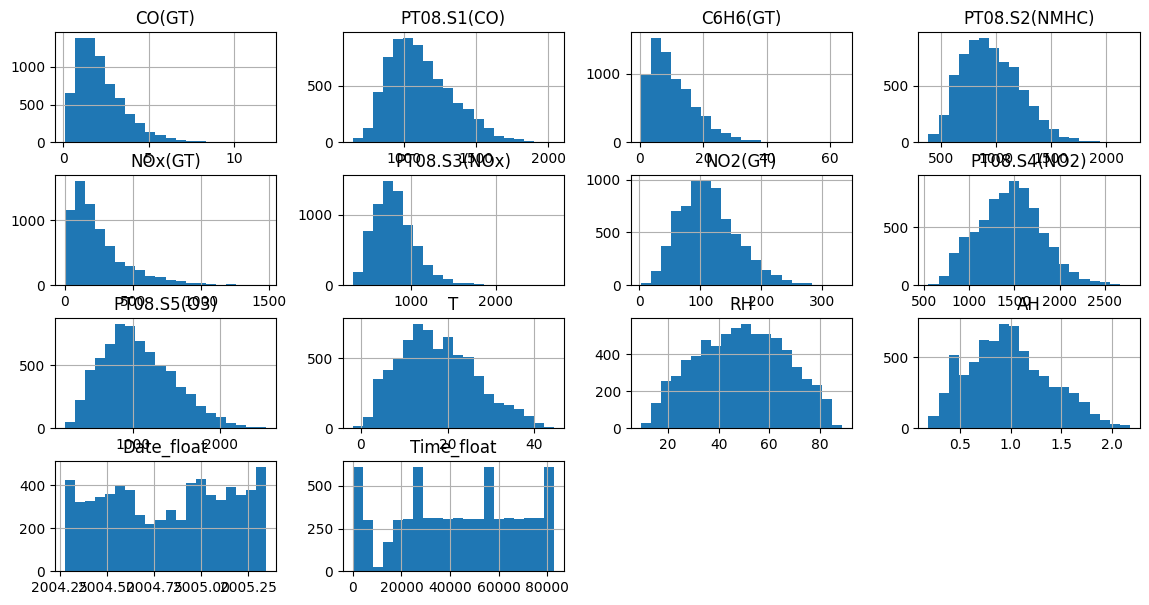

In [20]:
df.hist(figsize=(14, 7), bins=20)
plt.show()

<Axes: title={'center': 'Pearson Correlation of Features'}>

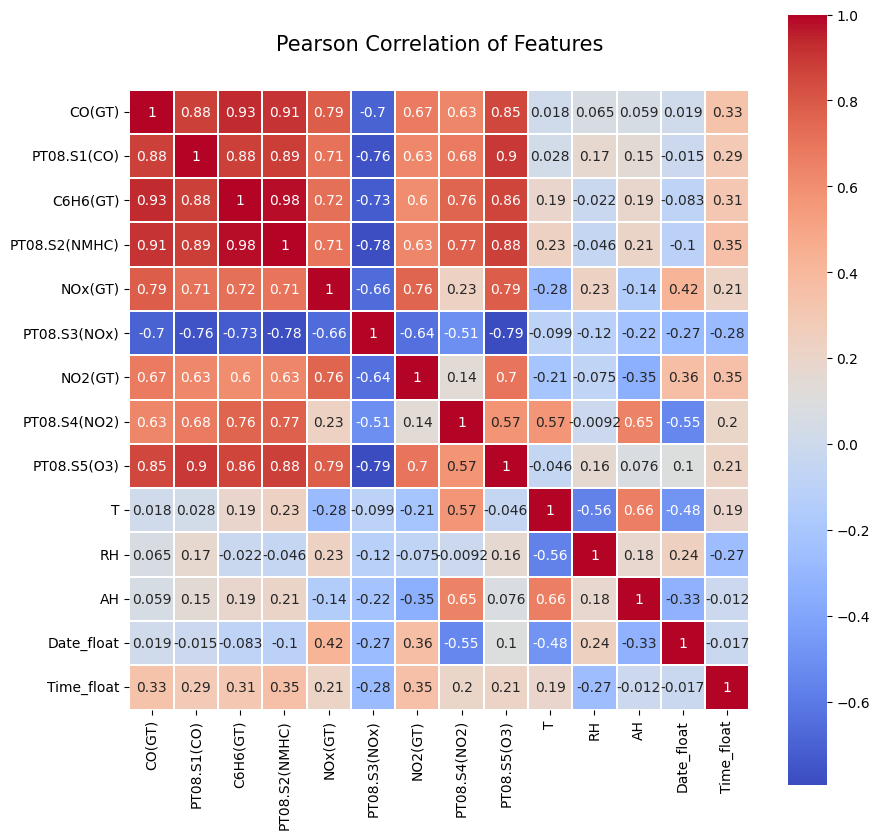

In [21]:
# Matriz de correlação para saber como as variáveis se relacionam
colormap = plt.cm.coolwarm
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [22]:
# Dropando colunas que se relacionam pouco com CO(GT) para não atrapalhar no ML
colunas_drop = ['T', 'RH', 'AH', 'Date_float', 'Time_float']
df.drop(columns=colunas_drop, axis=1, inplace=True)

In [23]:
df.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3)
0,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0
1,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0
2,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0
3,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0
4,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0


In [35]:
# Importando bibliotecas para realizar os algorítmos de ML
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [46]:
X = df.drop('CO(GT)', axis=1)
y = df['CO(GT)']

# Dividindo o dataset em dados de teste e treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [47]:
# Padronizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
models = [
    LinearRegression(),
    RandomForestRegressor(),
    ExtraTreesRegressor(),
    GradientBoostingRegressor(),
    KNeighborsRegressor(),
    SVR(kernel="rbf")
]

In [49]:
# Função para plotar scatter plot
def plot_scatter(y_true, y_pred, model_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--')
    plt.title(f"{model_name} - Scatter Plot")
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.grid(True)
    plt.show()

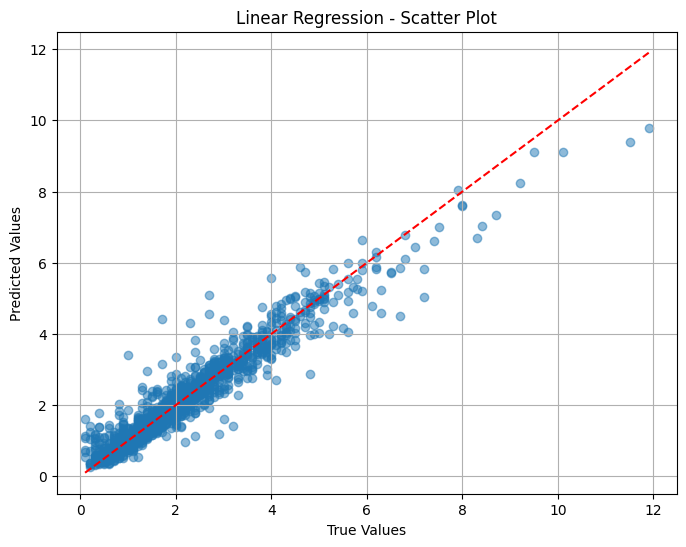

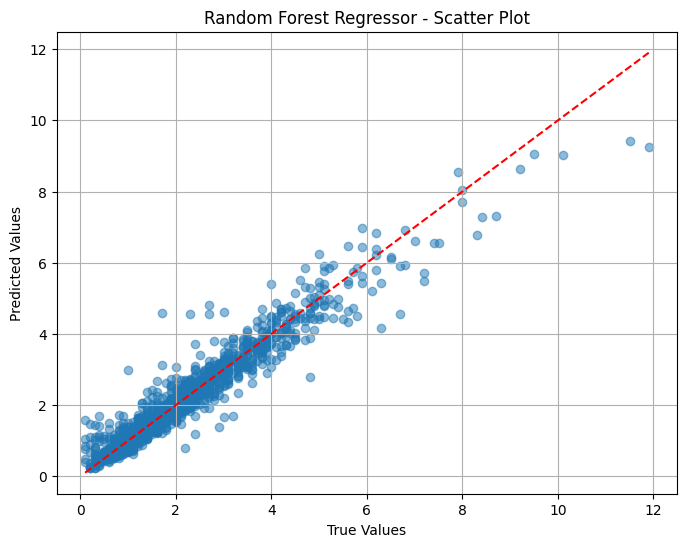

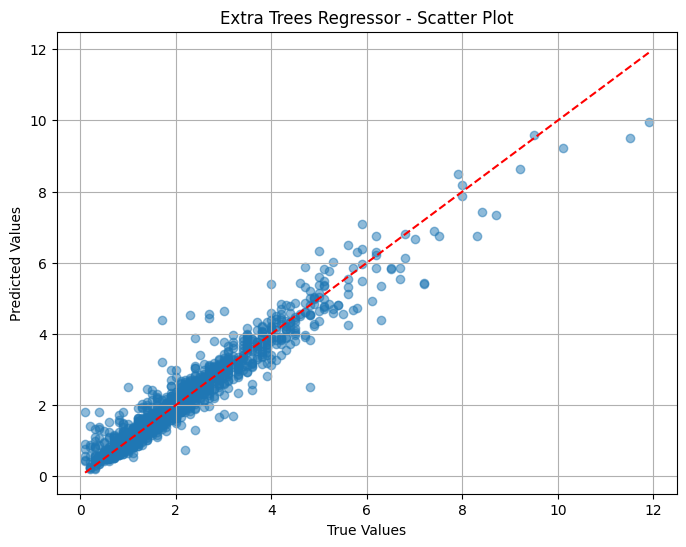

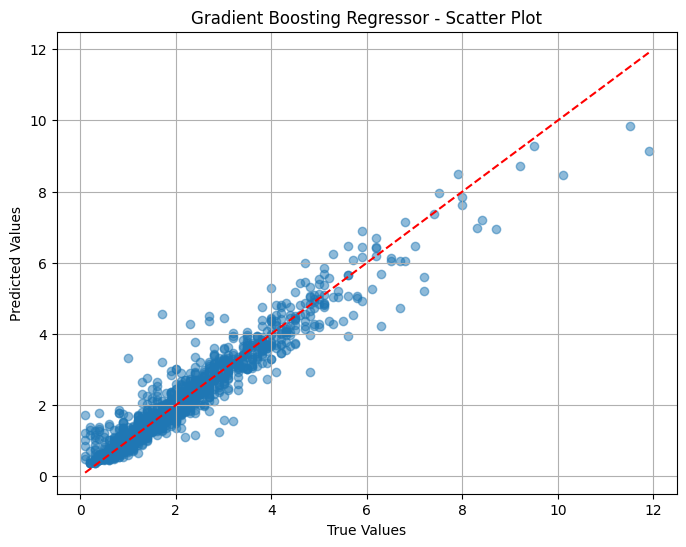

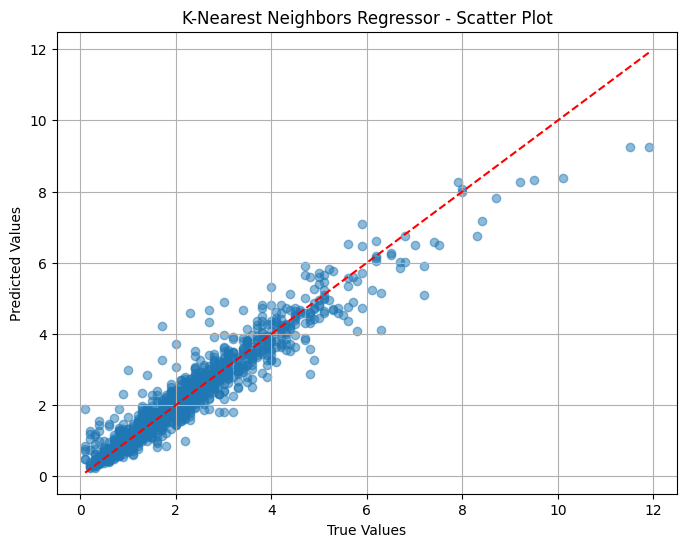

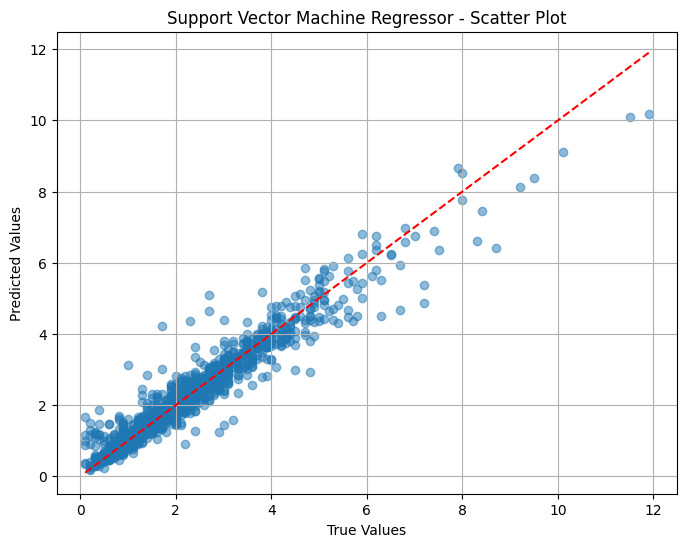

Linear Regression:
  MSE  = 0.16975316595816586
  MAE  = 0.26772071764486094
  R²   = 0.9208226117634267
  RMSE = 0.41201112358547537

Random Forest:
  MSE  = 0.1547617969762419
  MAE  = 0.2500446364290857
  R²   = 0.9278149846913757
  RMSE = 0.39339775924151105

Extra Trees:
  MSE  = 0.14449499064074872
  MAE  = 0.24550611951043916
  R²   = 0.9326036960334392
  RMSE = 0.380124967136794

Gradient Boosting:
  MSE  = 0.1653960310640308
  MAE  = 0.2646942741451329
  R²   = 0.9228548952802895
  RMSE = 0.40668910861250124

K-Nearest Neighbors:
  MSE  = 0.16495262778977682
  MAE  = 0.2569618430525558
  R²   = 0.9230617103520015
  RMSE = 0.4061436048859773

Support Vector Regressor:
  MSE  = 0.15228862869185758
  MAE  = 0.24357758280293787
  R²   = 0.9289685361101182
  RMSE = 0.39024175672505573



In [50]:
# Dicionário para armazenar os resultados
results = {}

# 1. Regressão Linear
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
results['Linear Regression'] = {'MSE': mse, 'MAE': mae, 'R²': r2, 'RMSE': rmse}
plot_scatter(y_test, y_pred, "Linear Regression")

# 2. Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
results['Random Forest'] = {'MSE': mse, 'MAE': mae, 'R²': r2, 'RMSE': rmse}
plot_scatter(y_test, y_pred, "Random Forest Regressor")

# 3. Extra Trees Regressor
et = ExtraTreesRegressor(n_estimators=100, random_state=42)
et.fit(X_train, y_train)
y_pred = et.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
results['Extra Trees'] = {'MSE': mse, 'MAE': mae, 'R²': r2, 'RMSE': rmse}
plot_scatter(y_test, y_pred, "Extra Trees Regressor")

# 4. Gradient Boosting Regressor
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
results['Gradient Boosting'] = {'MSE': mse, 'MAE': mae, 'R²': r2, 'RMSE': rmse}
plot_scatter(y_test, y_pred, "Gradient Boosting Regressor")

# 5. K-Nearest Neighbors Regressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
results['K-Nearest Neighbors'] = {'MSE': mse, 'MAE': mae, 'R²': r2, 'RMSE': rmse}
plot_scatter(y_test, y_pred, "K-Nearest Neighbors Regressor")

# 6. Support Vector Machine Regressor (SVR)
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
results['Support Vector Regressor'] = {'MSE': mse, 'MAE': mae, 'R²': r2, 'RMSE': rmse}
plot_scatter(y_test, y_pred, "Support Vector Machine Regressor")

# Imprimir os resultados
for model, metrics in results.items():
    print(f"{model}:")
    print(f"  MSE  = {metrics['MSE']}")
    print(f"  MAE  = {metrics['MAE']}")
    print(f"  R²   = {metrics['R²']}")
    print(f"  RMSE = {metrics['RMSE']}\n")


In [52]:
# O Extra Trees Regressor foi o algoritmo que funcionou melhor. Logo, vou aplicar as otimizações nele
# Baixando biblioteca scikit-optimize
%pip install scikit-optimize

In [55]:
# Importando bibliotecas para otimização
from skopt import BayesSearchCV
from skopt.space import Integer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [56]:
# Definir os espaços de hiperparâmetros para cada técnica
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

param_random = {
    'n_estimators': np.arange(10, 200, step=10),
    'max_depth': [None] + list(np.arange(10, 50, step=10)),
    'min_samples_split': np.arange(2, 10, step=1),
    'min_samples_leaf': np.arange(1, 10, step=1),
}

param_bayes = {
    'n_estimators': Integer(10, 200),
    'max_depth': Integer(1, 50),
    'min_samples_split': Integer(2, 10),
    'min_samples_leaf': Integer(1, 10),
}

In [59]:
def mostrar_metricas(modelo, mse, mae, r2, rmse):
  print(modelo)
  print(f"  MSE  = {mse}")
  print(f"  MAE  = {mae}")
  print(f"  R²   = {r2}")
  print(f"  RMSE = {rmse}")

Grid Search
  MSE  = 0.14402738628094763
  MAE  = 0.24322320014398852
  R²   = 0.9328217991346575
  RMSE = 0.37950940209821893


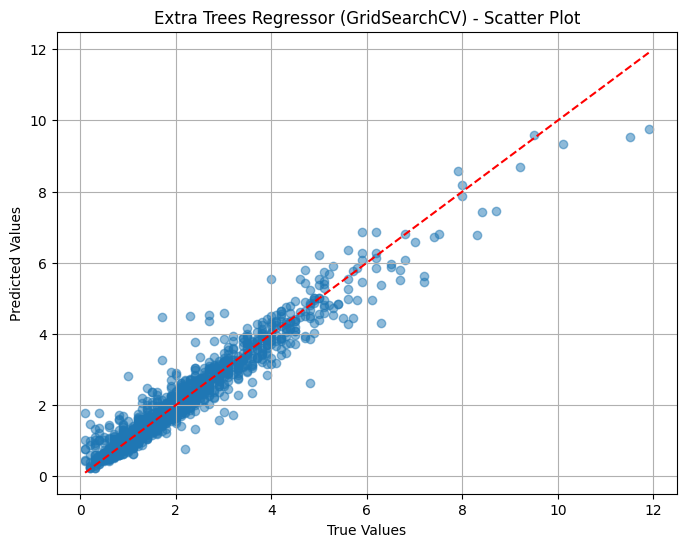

Randomized Search
  MSE  = 0.14557218576463204
  MAE  = 0.24307117518621596
  R²   = 0.9321012635983865
  RMSE = 0.3815392322745225


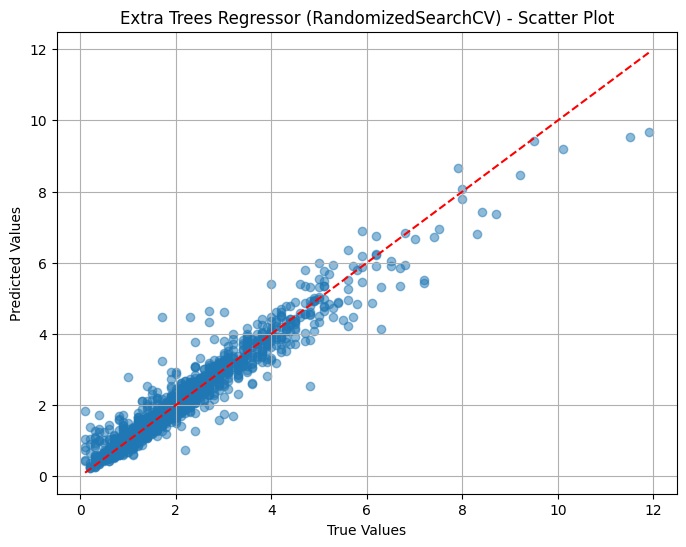

Bayes Search
  MSE  = 0.14357001692403945
  MAE  = 0.24330957115697305
  R²   = 0.9330351283585044
  RMSE = 0.37890634320903027


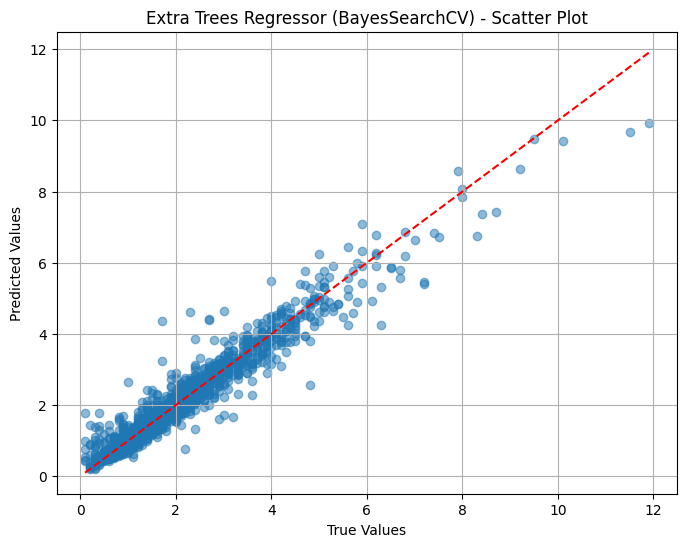

In [60]:
# GridSearchCV
grid_search = GridSearchCV(estimator=et, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2')
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
mostrar_metricas("Grid Search", mse, mae, r2, rmse)
plot_scatter(y_test, y_pred, "Extra Trees Regressor (GridSearchCV)")

# RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=et, param_distributions=param_random, n_iter=100, cv=5, n_jobs=-1, scoring='r2', random_state=42)
random_search.fit(X_train, y_train)
y_pred = random_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
mostrar_metricas("Randomized Search", mse, mae, r2, rmse)
plot_scatter(y_test, y_pred, "Extra Trees Regressor (RandomizedSearchCV)")

# BayesSearchCV
bayes_search = BayesSearchCV(estimator=et, search_spaces=param_bayes, n_iter=100, cv=5, n_jobs=-1, scoring='r2', random_state=42)
bayes_search.fit(X_train, y_train)
y_pred = bayes_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
mostrar_metricas("Bayes Search", mse, mae, r2, rmse)
plot_scatter(y_test, y_pred, "Extra Trees Regressor (BayesSearchCV)")